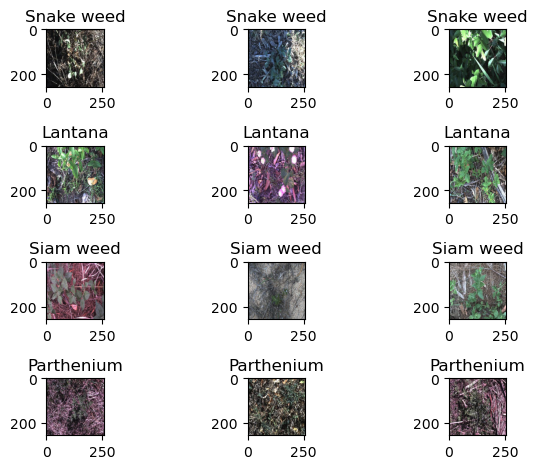

In [1]:
# Author: Matt Williams
# Version: 09/07/2022

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from shutil import copyfile, rmtree
import os
import random

# CHANGES TO YOUR ASSIGNED NUMBER
DATASET_NUMBER = "36"


CWD = os.path.abspath(os.getcwd())
NEGATIVES_DIR = os.path.join(CWD, "Negatives")
FOUR_CLASS_DIR = os.path.join(CWD, "Weed-4class-{}".format(DATASET_NUMBER))

NEGATIVE_LABELS_FILE = os.path.join(NEGATIVES_DIR, "Negatives.csv")
FOUR_CLASS_LABELS_FILE = os.path.join(FOUR_CLASS_DIR, "Weed-4class-{}-labels.csv".format(DATASET_NUMBER))

FILENAME_COL = "Filename"
SPECIES_COL = "Species"

def combine_datasets(): 
    negatives_df = pd.read_csv(NEGATIVE_LABELS_FILE)
    four_class_df = pd.read_csv(FOUR_CLASS_LABELS_FILE)


    species = list(set(four_class_df[SPECIES_COL]))
    combined_df = pd.concat([negatives_df, four_class_df])

    os.remove(FOUR_CLASS_LABELS_FILE)

    combined_df.to_csv(FOUR_CLASS_LABELS_FILE, index = False)

    for i in range(len(negatives_df.index)):  
        file_name = negatives_df[FILENAME_COL].values[i]

        src = os.path.join(NEGATIVES_DIR, file_name)
        dst = os.path.join(FOUR_CLASS_DIR, file_name)
        copyfile(src, dst)

    rmtree(path = NEGATIVES_DIR, ignore_errors=True)

    return combined_df, species

def show_random_images(combined_df, species):
    num_chosen_imgs = 3
    num_rows = 4
    num_cols = num_chosen_imgs

    cur_subplot_index = 1

    for spec in species:
        cur_spec_df = combined_df.loc[combined_df[SPECIES_COL] == spec]

        img_numbers_chosen = random.sample(range(len(cur_spec_df.index)), k = num_chosen_imgs)

        for num in img_numbers_chosen: 
            file_name = cur_spec_df[FILENAME_COL].values[num]
            pic_title = cur_spec_df[SPECIES_COL].values[num]

            src = os.path.join(FOUR_CLASS_DIR, file_name)
            image = mpimg.imread(src)

            plt.subplot(num_rows, num_cols, cur_subplot_index)
            plt.title(pic_title)
            cur_subplot_index += 1
            plt.imshow(image)

    plt.tight_layout()
    plt.show()
    

if __name__ == "__main__": 
   
    combined_df, species = combine_datasets()
    show_random_images(combined_df, species)




    

